<a href="https://colab.research.google.com/github/FontanaDaniel1/GeoPandas_esericizi/blob/main/esercitazione_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install geopandas
%matplotlib inline

import pandas as pd
import geopandas

In [ ]:
!pip install contextily
import contextily

caricare il geodataset delle piste ciclabili bike_ciclabili.zip

In [ ]:
piste_ciclabili = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/bike_ciclabili.zip")

visualizzaere il geodataset delel piste ciclabili

In [ ]:
piste_ciclabili

caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/ds964_nil_wm.zip")
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini) e le piste ciclabili

In [ ]:
quartieri3857 = quartieri.to_crs(epsg = 3857)
piste_ciclabili3857 = piste_ciclabili.to_crs(epsg = 3857)

In [ ]:
ax = piste_ciclabili3857.plot(figsize=(20,20), facecolor = 'none') 
quartieri3857.plot(ax = ax, edgecolor = 'k', facecolor = 'none', linewidth = 3)
contextily.add_basemap(ax)

trovare il quartiere meno esteso

In [ ]:
menoesteso = quartieri3857[quartieri3857['Shape_Area'] == quartieri3857['Shape_Area'].min()]

trovare il quartiere più esteso

In [ ]:
piùesteso = quartieri3857[quartieri3857['Shape_Area'] == quartieri3857['Shape_Area'].max()]

visualizzare i due quartieri sulla mappa di Milano con i colori indicati nella figura sotto


In [ ]:
ax = menoesteso.plot(figsize=(15,15), edgecolor = 'b', facecolor = 'red')
piùesteso.plot(ax = ax, facecolor = 'yellow', alpha = 0.5, edgecolor = 'k')
contextily.add_basemap(ax)

salvare in un geodataframe le informazioni sul quartiere di Affori, prendendole dal geodataframe dei quartieri

In [ ]:
affori = quartieri3857[quartieri3857["NIL"] == ('AFFORI')]
affori

trovare le piste ciclabili che passano per il quartiere di Affori

In [ ]:
piste_affori = piste_ciclabili3857[piste_ciclabili3857.intersects(affori.unary_union)]
piste_affori

visualizzare su una mappa il quartiere di Affori e le piste ciclabili che lo attraversano evidenziare bene in rosso le piste ciclabili come nell'esempio sotto

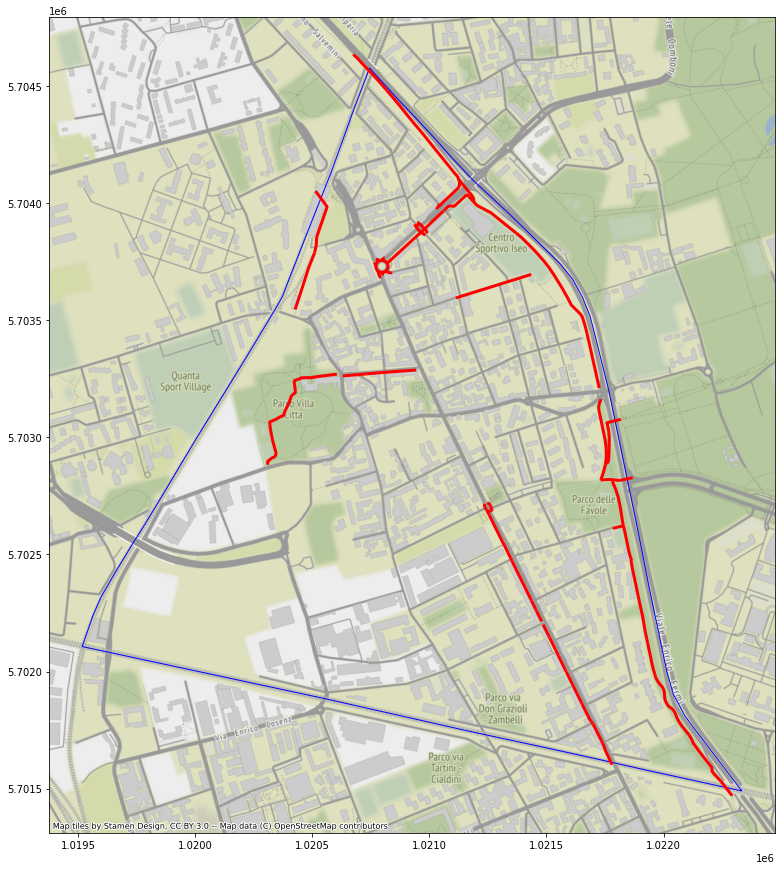

In [ ]:
ax = affori.plot(figsize=(15,15), edgecolor = 'b', facecolor = 'none')
piste_affori.plot(ax = ax, edgecolor = 'r', linewidth = 3)
contextily.add_basemap(ax)